<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller Transformaciones - Filtros</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Flavio Prieto</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: faprietoo@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>23 de Marzo de 2023</p>
<br>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Valentina Hernandez</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Felipe Gutierrez</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Manuel Rojas</p>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.image as mpimg

from scipy.signal import convolve2d as conv2

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Transformaciones Geométricas</h1>

<h1>Función: <span style="color:blue">cv2.resize</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#resize

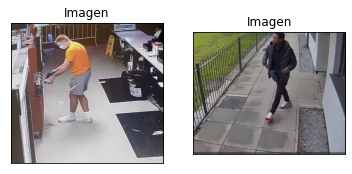

In [3]:
#cv.Resize
img1 = cv2.imread('archive/human detection dataset/1/119.png',1) # Carga imagen en color
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('archive/human detection dataset/1/52.png',1) # Carga imagen en color
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#img2 = np.zeros((100,400))
#cv.Resize(img,img2,interpolation = cv2.INTER_LINEAR)
#height, width = img.shape
#img1r = cv2.resize(img, (2*width, height//4), interpolation = cv2.INTER_CUBIC)

plt.figure(1)
plt.subplot(121), plt.imshow(img1, cmap='gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2, cmap='gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros lineales</h1>

<h1>Función: <span style="color:blue">cv2.filter2D</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=smooth#bilateralfilter

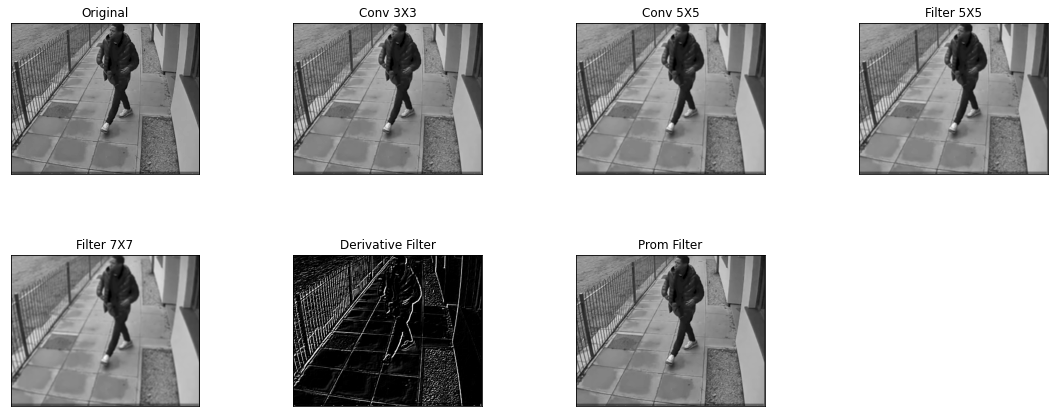

In [15]:
img = cv2.imread('archive/human detection dataset/1/52.png',0)

#Promedio
kernel1 = np.ones((3, 3)) / 9
kernel2 = np.ones((5, 5)) / 25
kernel3 = np.ones((7, 7)) / 49
kernel4 = np.asarray([[2,2,0],[2,0,-2],[0,-2,-2]]) # No es filtro promediador, su sumatoria de cero
kernel5 = np.asarray([[1,1,5],[1,5,2],[5,2,2]])/24

#Convolución
imgC1 = conv2(img, kernel1, 'same') # Convoluciona img y kernel1 dando como resultado la misma una imagen con el mismo
 # tamaño de img dado por el parámetro mode = "same"
imgC2 = conv2(img, kernel2, 'same')

# Como tal la función filter2D no hace un proceso de convolución sino de correlación.
#
# El proceso de convolución es utilizado para el suvizado, detección de bordes y de extracción de características; mientras
# que la correlación coincidencia de plantillas, reconocimiento de patrones y detección de objetos.
#
# Para utilizar la función filter2D como proceso de convolición primero se debe reflejar el kernel con respecto a su píxel
# central o anchor y luego aplicar la función.
kernel2 = cv2.flip(kernel2, flipCode = -1) # -1 para que se haga el reflexión en los 2 ejes
imgF2 = cv2.filter2D(img,-1,kernel2) # el valor de -1 mantiene la profundidad de la imagen resultante con respecto a la 
# imagen original (la profundidad de la imagen se puede obtener con img.dtype, para este caso se tiene el valor estandar
# uint8)
# test = img.dtype
kernel3 = cv2.flip(kernel3, flipCode = -1)
imgF3 = cv2.filter2D(img,-1,kernel3)
kernel4 = cv2.flip(kernel4, flipCode = -1)
imgF4 = cv2.filter2D(img,-1,kernel4)
kernel5 = cv2.flip(kernel5, flipCode = -1)
imgF5 = cv2.filter2D(img,-1,kernel5)
#imgC3 = conv2(img, kernel3, 'same')
#imgC4 = conv2(img, kernel4, 'same')
#imgC5 = conv2(img, kernel5, 'same')

#Visualización
# print(imgC2==imgF2)

plt.figure(1)
plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2.5,hspace=0.25,wspace=0.5)

plt.subplot(241),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(242),plt.imshow(imgC1,cmap = 'gray')
plt.title('Conv 3X3'), plt.xticks([]), plt.yticks([])

plt.subplot(243),plt.imshow(imgC2,cmap = 'gray')
plt.title('Conv 5X5'), plt.xticks([]), plt.yticks([])

plt.subplot(244),plt.imshow(imgF2,cmap = 'gray')
plt.title('Filter 5X5'), plt.xticks([]), plt.yticks([])

plt.subplot(245),plt.imshow(imgF3,cmap = 'gray')
plt.title('Filter 7X7'), plt.xticks([]), plt.yticks([])

plt.subplot(246),plt.imshow(imgF4,cmap = 'gray')
plt.title('Derivative Filter'), plt.xticks([]), plt.yticks([])

plt.subplot(247),plt.imshow(imgF5,cmap = 'gray')
plt.title('Prom Filter'), plt.xticks([]), plt.yticks([])

plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros de suavizado</h1>

<h1>Función: <span style="color:blue">cv2.blur</span></h1>

<h1>Función: <span style="color:blue">cv2.medianBlur</span></h1>

<h1>Función: <span style="color:blue">cv2.GaussianBlur</span></h1>

<h1>Función: <span style="color:blue">cv2.bilateralFilter</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=smooth#bilateralfilter

In [30]:
def showSmoothings(img):
    
    # Blur: Usualmente usado para la reducción de ruido y el suavizado
    sal1 = cv2.blur(img,(5,5)) # (5,5) hace referencia al tamaño del kernel, se le puede definir anchor y el tipo de borde

    # Median: Usualmente usado para remover el ruido tipo sal y pimienta 
    sal2 = cv2.medianBlur(img,5) # El tamaño del kernel se define con valores impares; cada canal se puede procesar de forma
    # independiente. 

    # Gaussian: Usualmente usado para la reducción de ruido y el suavizado
    sal3 = cv2.GaussianBlur(img,(5,5), 0) # (5,5) es el tamaño del kernel (deben ser números impares); 0 hace referencia al 
    # al valor de sigma de la función de distribución, un número distinto de un entero positivo toma sigma como 
    # sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 
    # test1 = cv2.getGaussianKernel(5,0)
    # print(test1)
    
    # Bilateral: Usualmente usado para la preservación de bordes y la reducción de ruido
    sal4 = cv2.bilateralFilter(img,9,75,75)

    # Visualization
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(231),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(sal1,cmap = 'gray')
    plt.title('Blur'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(sal2,cmap = 'gray')
    plt.title('Median'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(234),plt.imshow(sal3,cmap = 'gray')
    plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
    plt.subplot(235),plt.imshow(sal4,cmap = 'gray')
    plt.title('Bilateral'), plt.xticks([]), plt.yticks([])

    plt.show()

[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]


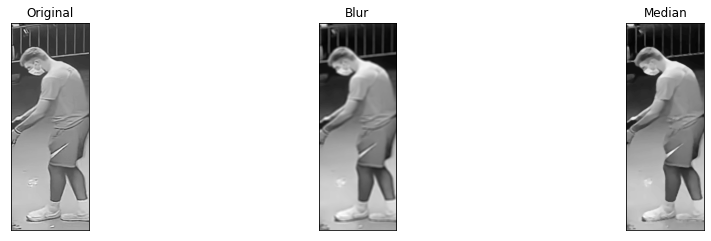

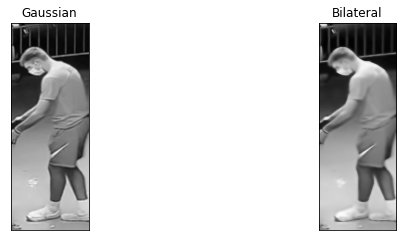

In [31]:
img = cv2.imread('archive/human detection dataset/1/119.png',0)[0:400,150:300]

showSmoothings(img)

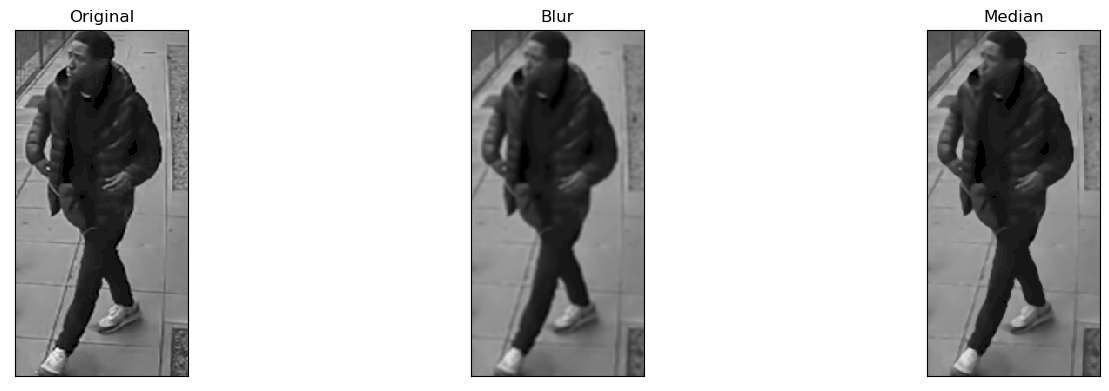

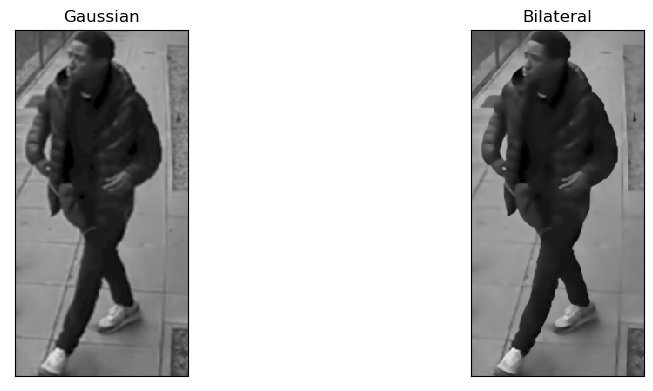

In [19]:
img = cv2.imread('archive/human detection dataset/1/52.png',0)[0:400,300:500]

showSmoothings(img)

In [43]:
print(img.shape)

(720, 1280, 3)


<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros de realce (derivativos)</h1>

<h1>Función: <span style="color:blue">cv2.Sobel</span></h1> 

In [26]:
def getSobel(img):
    
    #Sobel: cv2.Sobel(src, ddepth, dx, dy, ksize)
    sobelx = abs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
    sobely = abs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(sobelx+sobely,cmap = 'gray')
    plt.title('Sobel'), plt.xticks([]), plt.yticks([])
    plt.show()

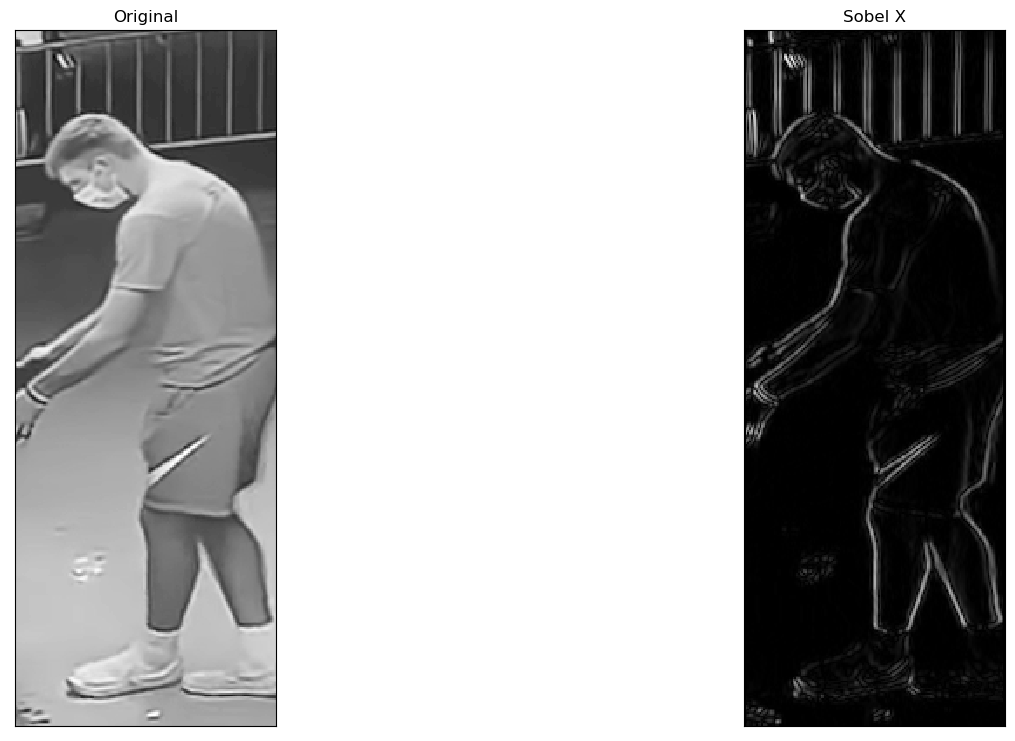

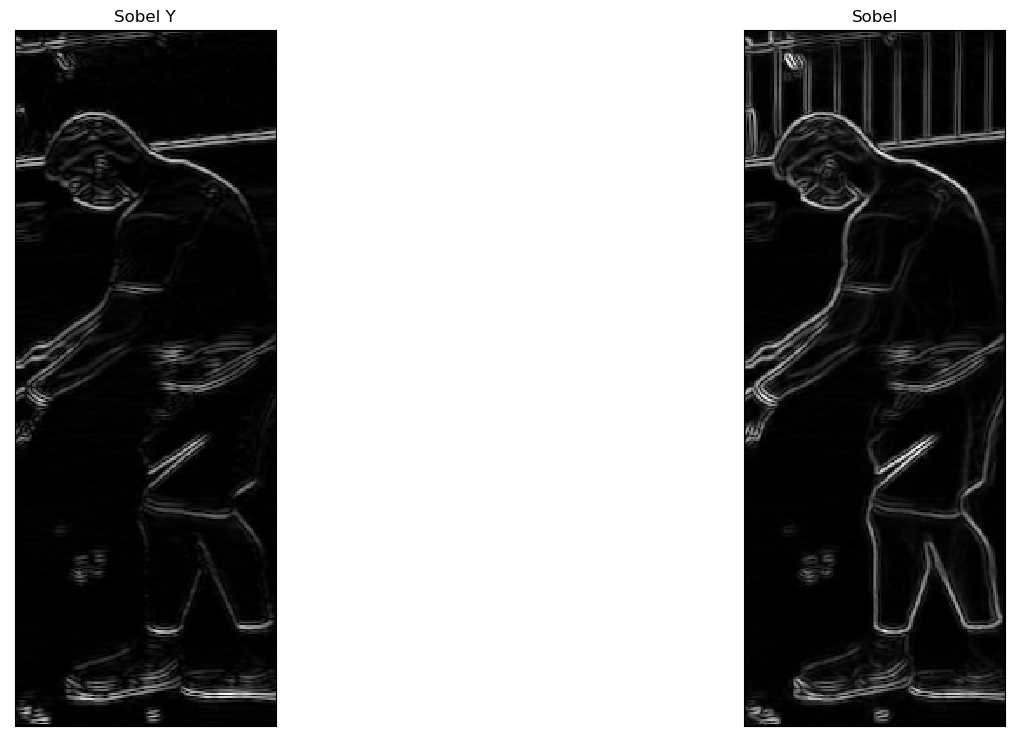

In [27]:
img = cv2.imread('archive/human detection dataset/1/119.png',0)[0:400,150:300]

getSobel(img)

<h1>Función: <span style="color:blue">cv2.Laplacian</span></h1>

In [29]:
def getLaplacians(img):
    
    imgblur = cv2.medianBlur(img,3)
    
    #cv2.Laplacian(src, ddepth)
    laplacian = abs(cv2.Laplacian(img,cv2.CV_64F,ksize=1))
    laplacian2 = abs(cv2.Laplacian(imgblur,cv2.CV_64F,ksize=5))

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2.5,hspace=0.25,wspace=0.5)

    plt.subplot(131),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(laplacian2,cmap = 'gray')
    plt.title('Laplacian after smoothing'), plt.xticks([]), plt.yticks([])

    plt.show()

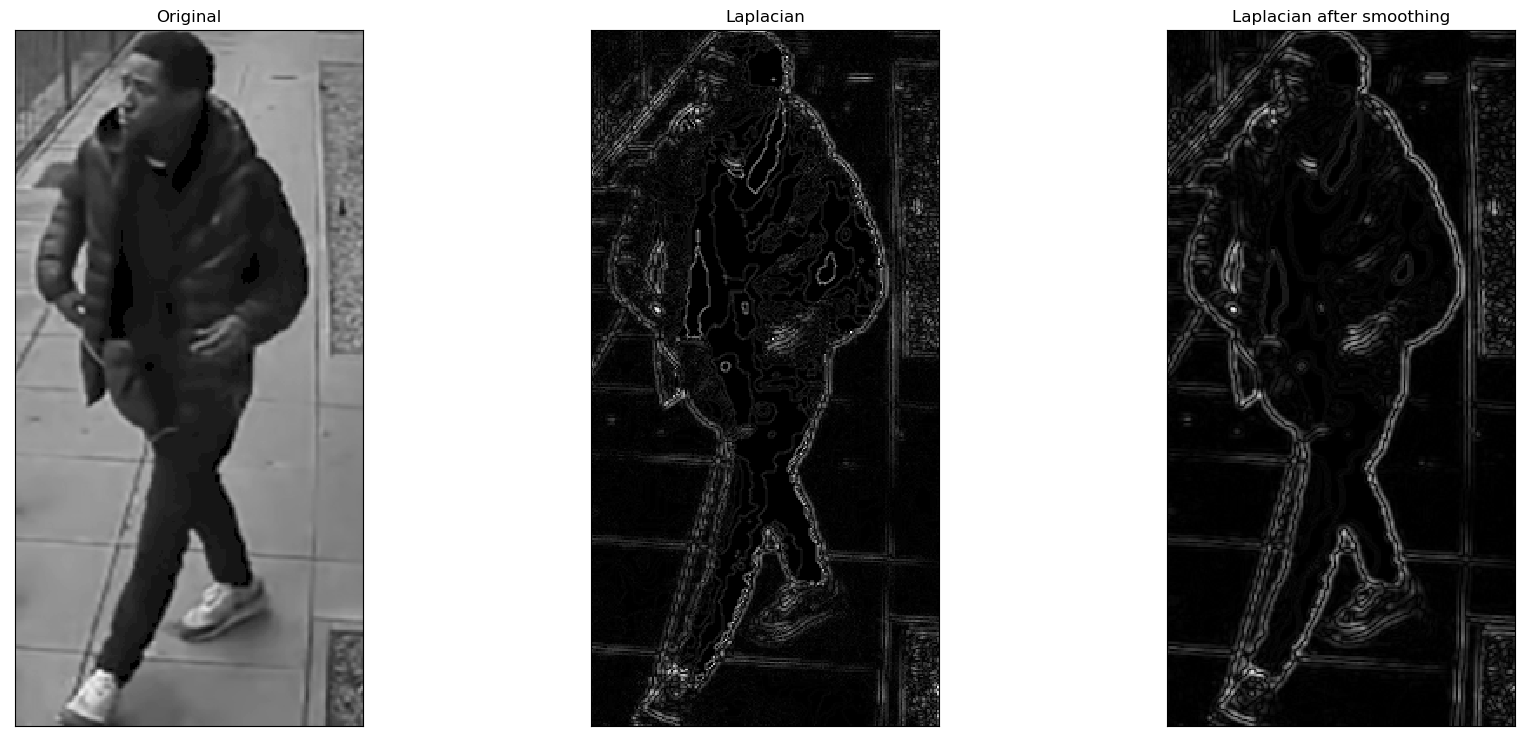

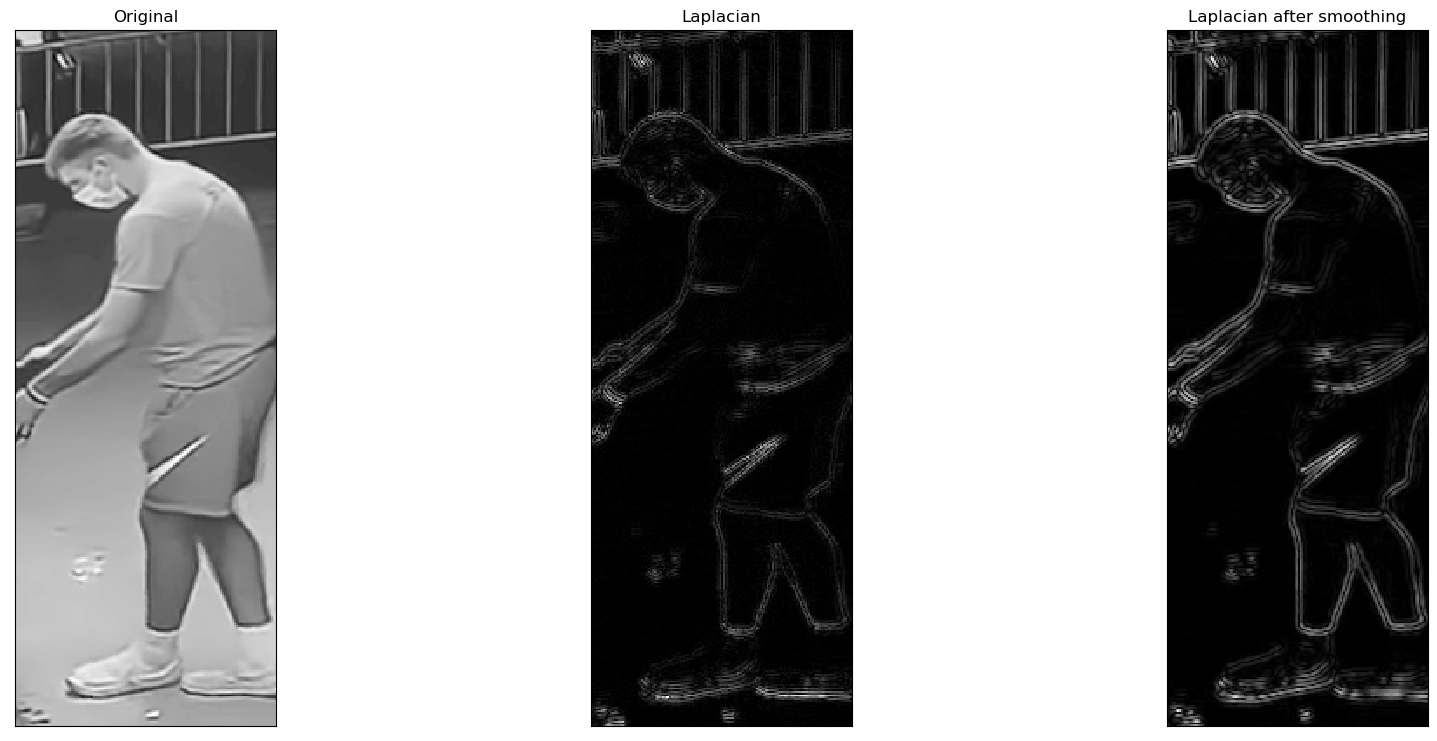

In [64]:
img = cv2.imread('archive/human detection dataset/1/52.png',0)[0:400,300:500]

getLaplacians(img)

img = cv2.imread('archive/human detection dataset/1/119.png',0)[0:400,150:300]

getLaplacians(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


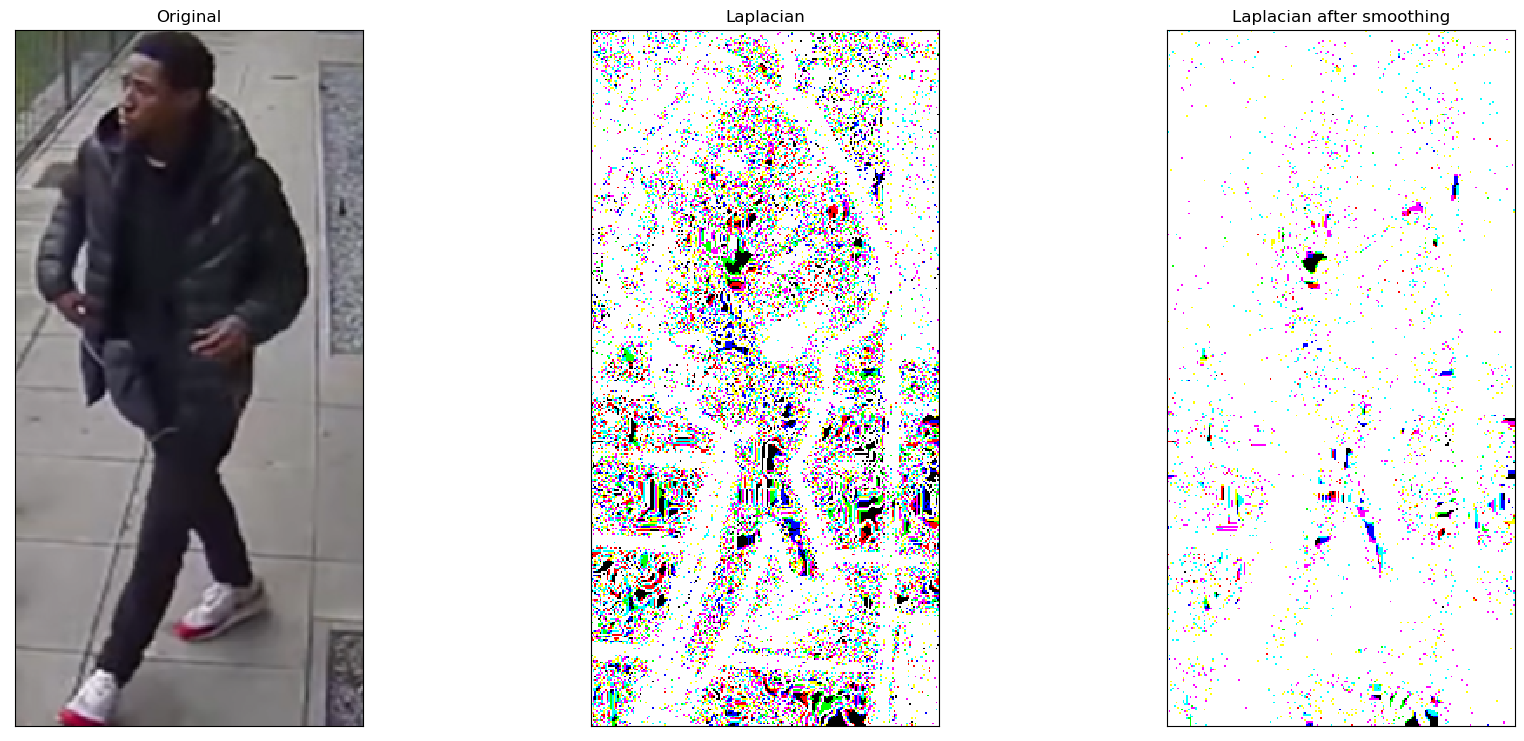

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


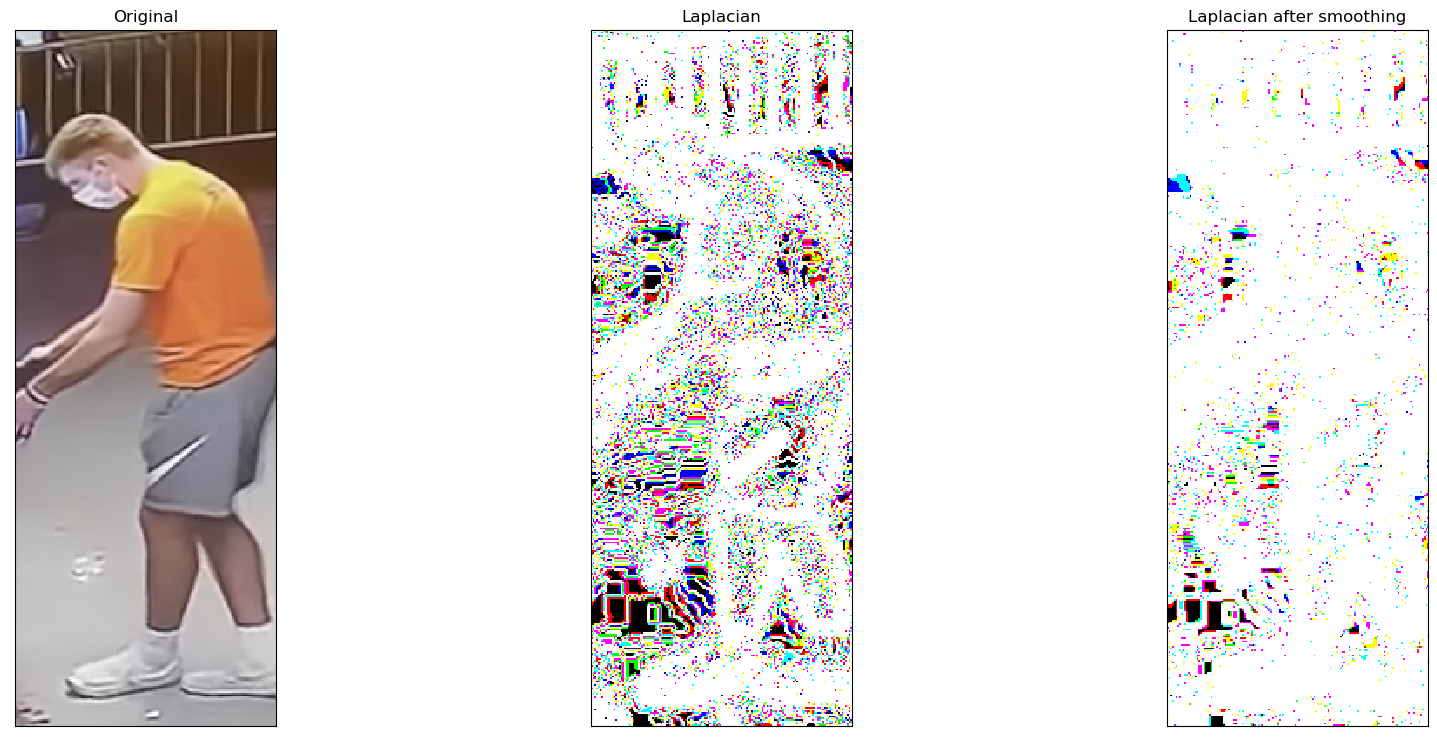

In [65]:
img = cv2.imread('archive/human detection dataset/1/52.png',1)[0:400,300:500]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

getLaplacians(img)


img = cv2.imread('archive/human detection dataset/1/119.png',1)[0:400,150:300]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

getLaplacians(img)

In [37]:
#img = cv2.imread('archive/human detection dataset/1/52.png',1)[0:400,300:500]

#r,g,b = cv2.split(img)
#chans = (r,g,b)

#for chan in chans:
 #   getLaplacians(chan)

<h1>Función: <span style="color:blue">cv2.Canny</span></h1>  

In [39]:
#Canny
#https://en.m.wikipedia.org/wiki/Canny_edge_detector
#http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

def getCanny(img):
    edges = cv2.Canny(img,80,200)

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    
    return edges

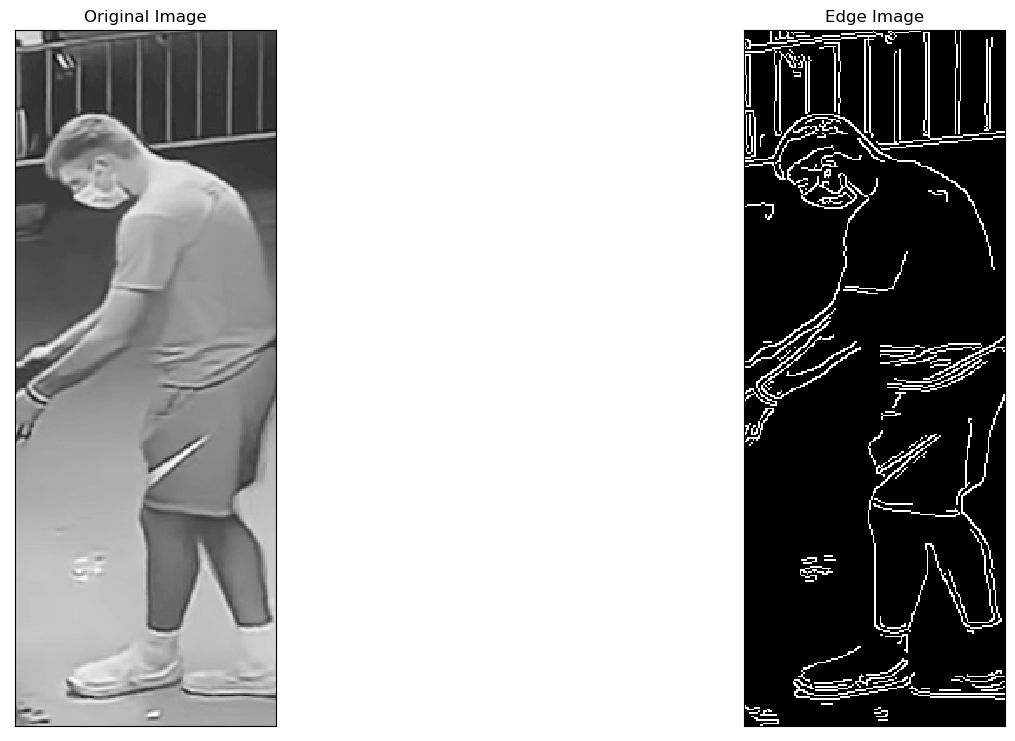

In [40]:
img = cv2.imread('archive/human detection dataset/1/119.png',0)[0:400,150:300]
edges = getCanny(img)

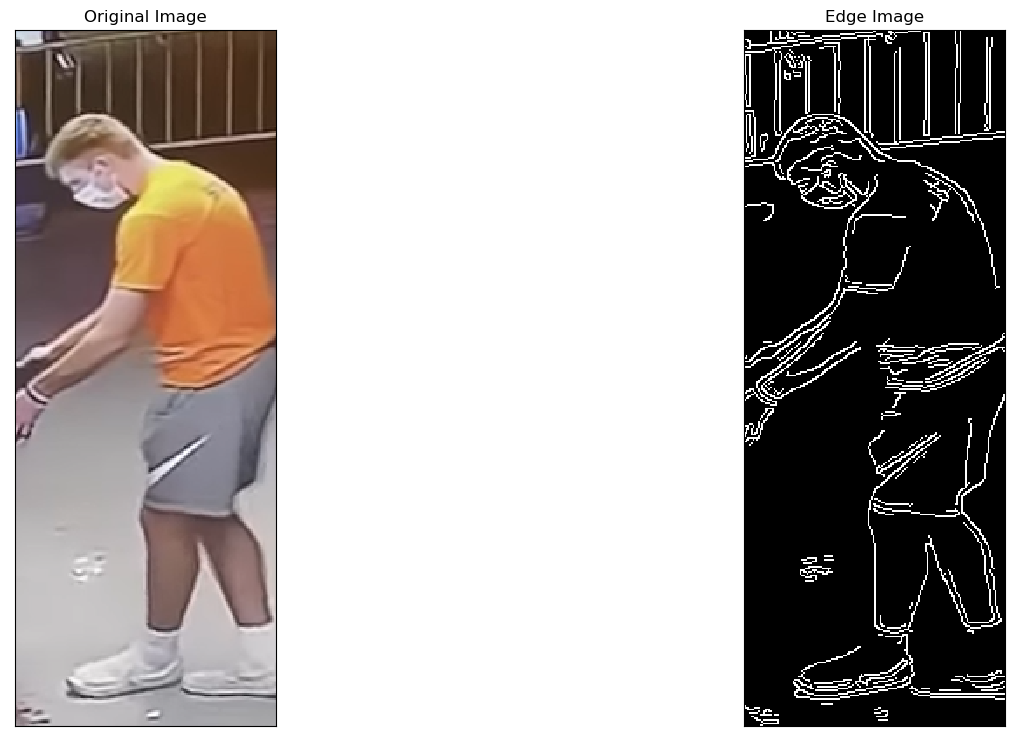

In [52]:
img = cv2.imread('archive/human detection dataset/1/119.png',1)[0:400,150:300]

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges2 = getCanny(img)

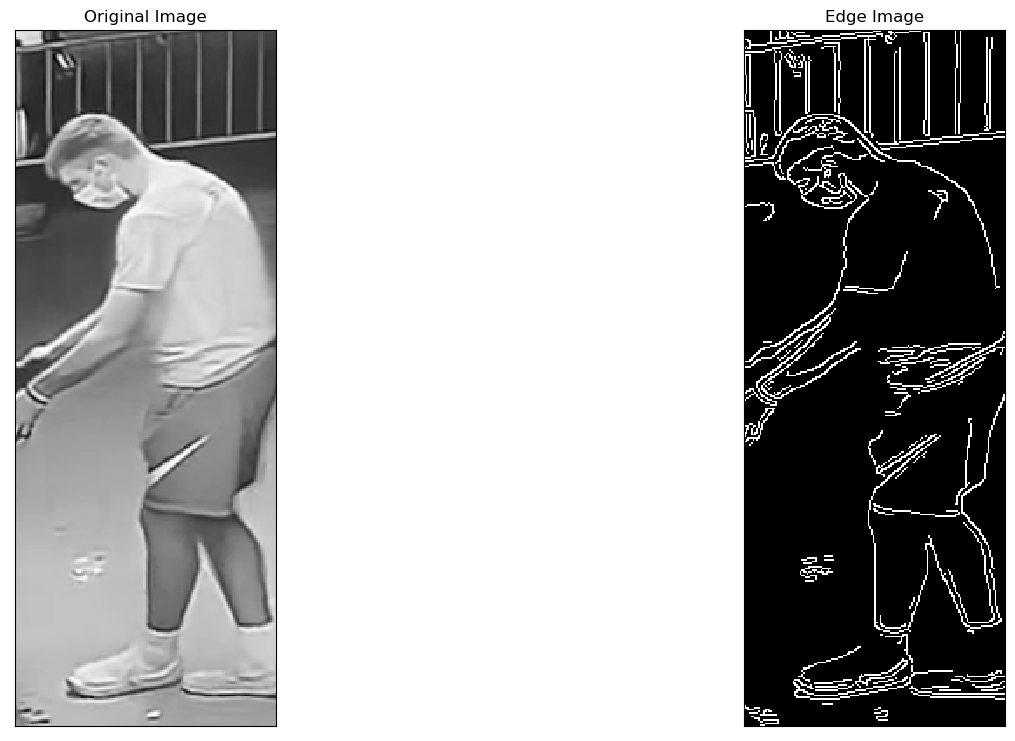

In [46]:
img = cv2.imread('archive/human detection dataset/1/119.png',1)[0:400,150:300]

img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(img_hsv)
edges3 = getCanny(v)

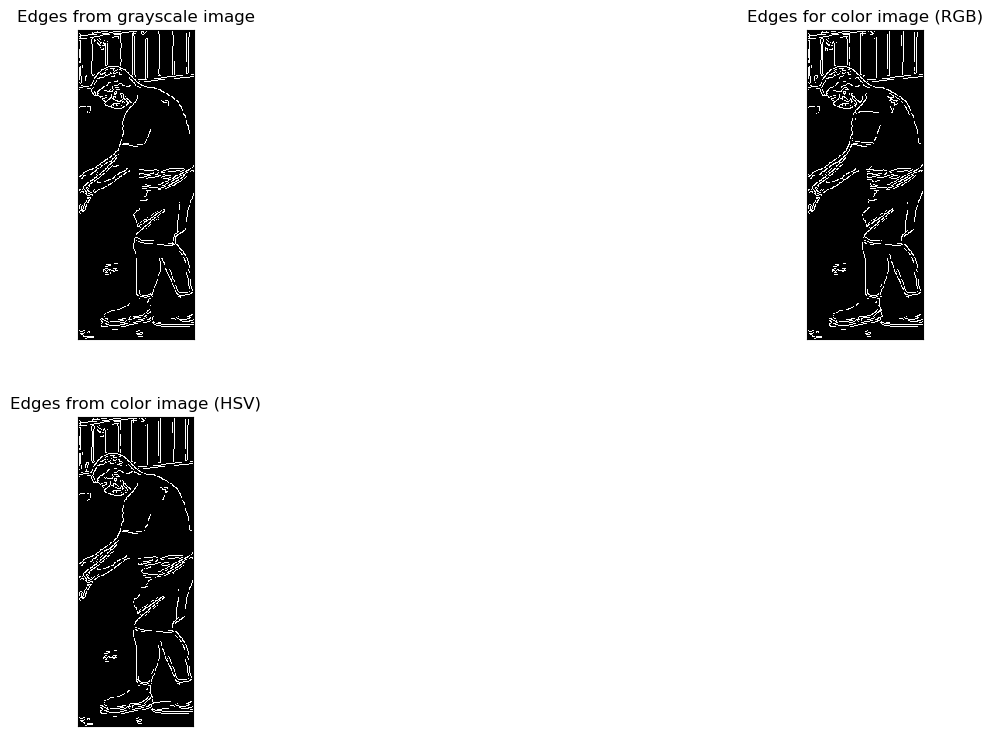

In [53]:
plt.figure(1)
plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(221),plt.imshow(edges,cmap='gray')
plt.title('Edges from grayscale image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges2,cmap = 'gray')
plt.title('Edges for color image (RGB)'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges3,cmap = 'gray')
plt.title('Edges from color image (HSV)'), plt.xticks([]), plt.yticks([])

plt.show()

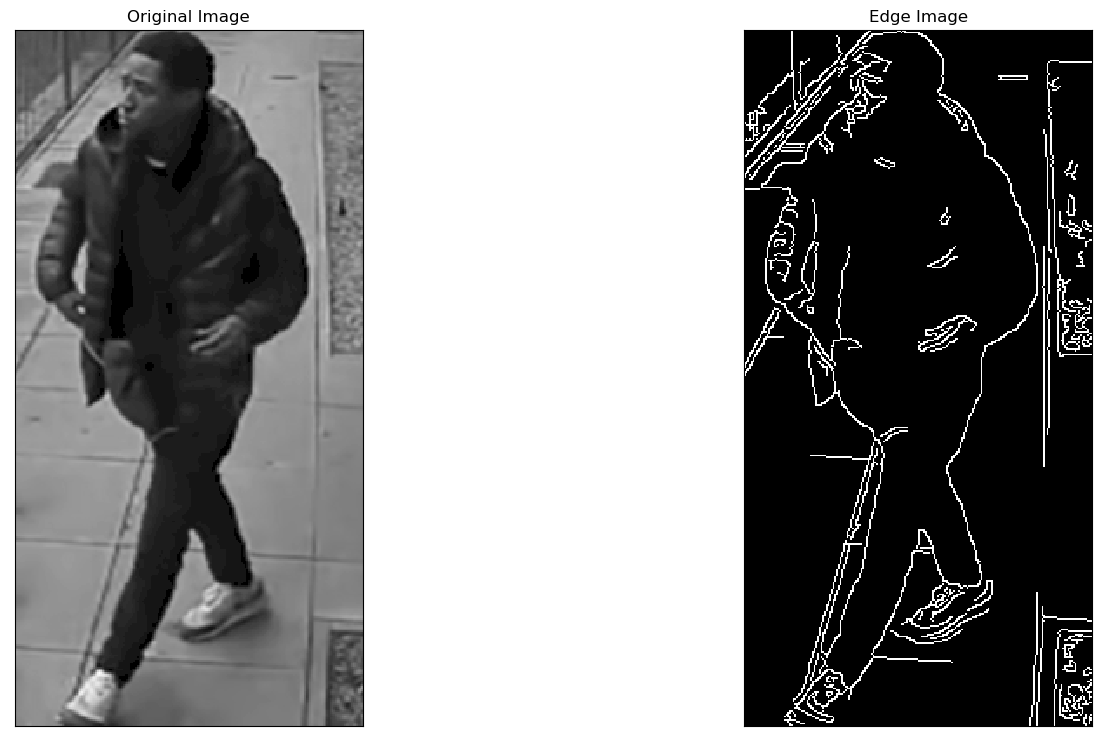

In [54]:
img = cv2.imread('archive/human detection dataset/1/52.png',0)[0:400,300:500]
edges = getCanny(img)

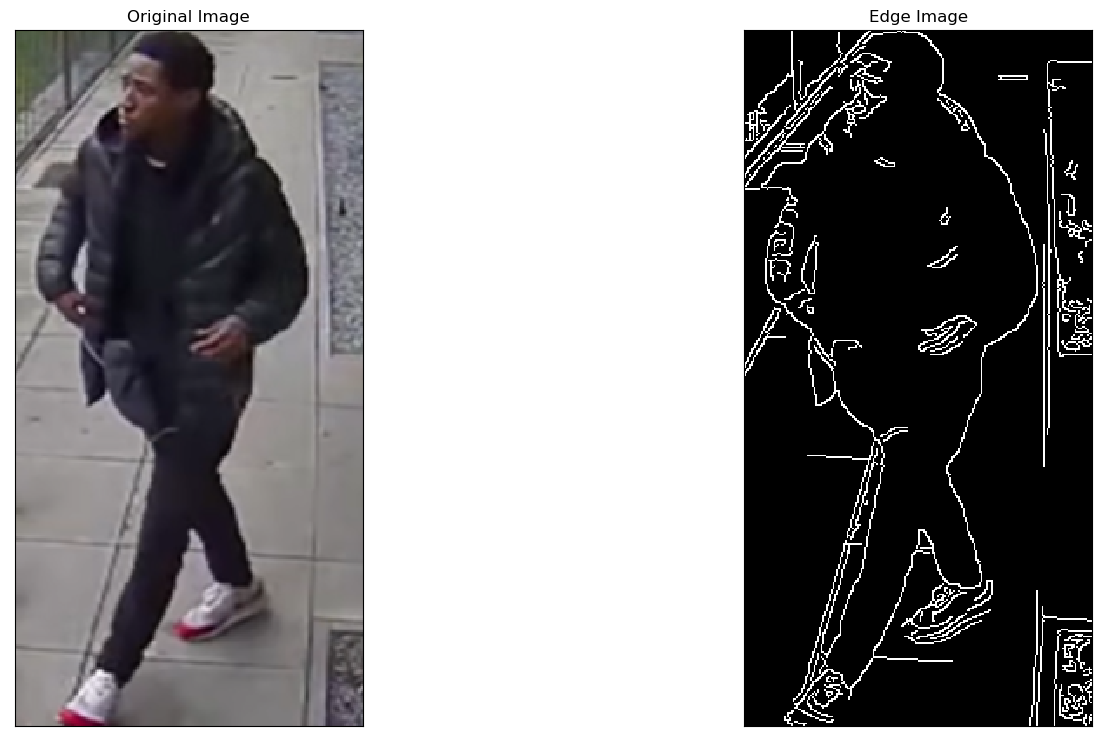

In [58]:
img = cv2.imread('archive/human detection dataset/1/52.png',1)[0:400,300:500]

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges2 = getCanny(img)

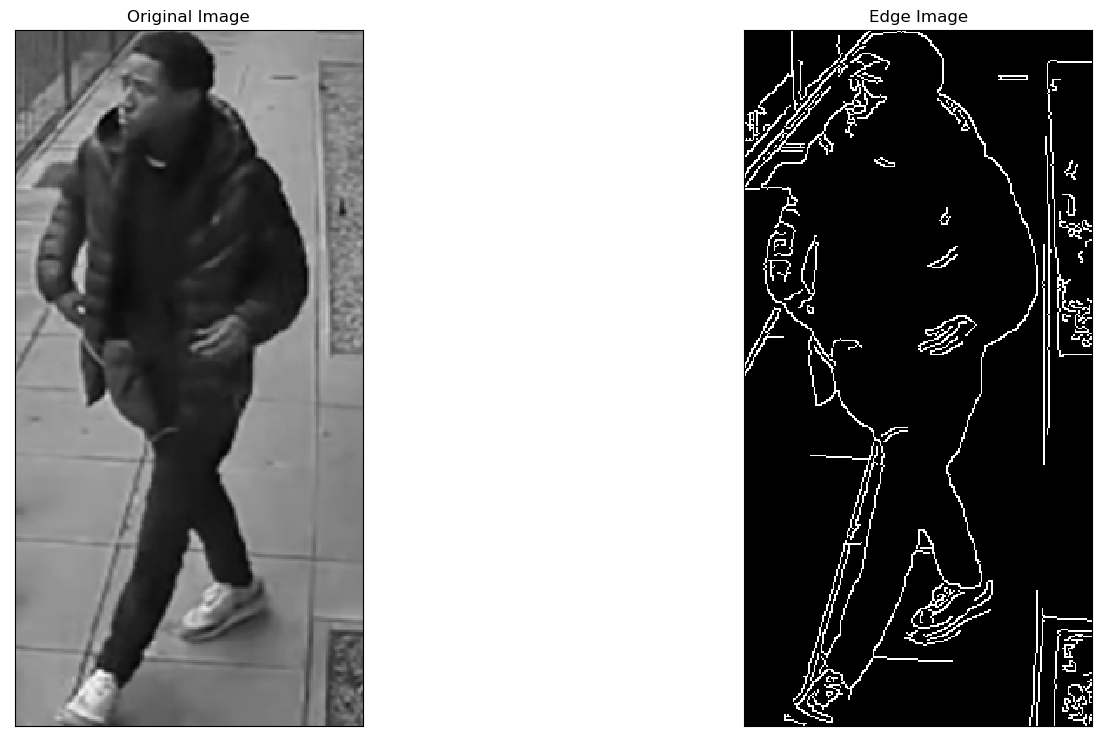

In [57]:
img = cv2.imread('archive/human detection dataset/1/52.png',1)[0:400,300:500]

img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(img_hsv)
edges3 = getCanny(v)

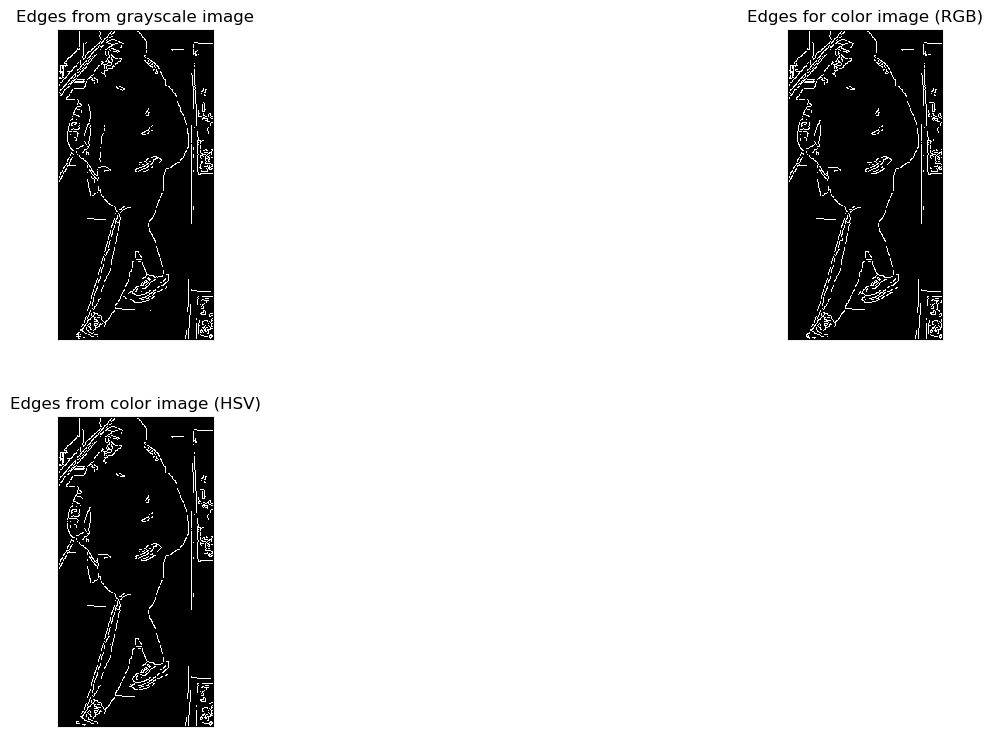

In [59]:
plt.figure(1)
plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(221),plt.imshow(edges,cmap='gray')
plt.title('Edges from grayscale image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges2,cmap = 'gray')
plt.title('Edges for color image (RGB)'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges3,cmap = 'gray')
plt.title('Edges from color image (HSV)'), plt.xticks([]), plt.yticks([])

plt.show()

# Analisis

- Los filtros lineales y de suavizado en general se da la impresión que pueden no favorecernos mucho ya que difuminan los bordes y nos generan mayor dificultad en la identificación de las personas. De los filtros lineales que consideramos que pueden servirnos estan los de resaltar bordes o derivativos, especificamente el del kernel 4 consideramos que puede mejorarnos en la idenficacion de las fronteras y posteriormente ayudar a la identificacion del cuerpo de un ser humano.
- Por otro lado, reforzando la idea de los filtros derivativos el filtro de sobel con gradiente en las dos direcciones resulta muy atractivo para la identificacion de personas y sus bordes, quiza aun resulta un poco difuso su utilizacion pero pensando en elementos como la función de esqueletización podriamos realizar acercamientos a la identificacion de las personas.

- Otra caracteristica interesante observada es que en el filtro laplaciano funciona muy bien para las dos imagenes de muestra en escala de grises pero trabaja de forma no funcional para el caso de estas mismas imagenes en color, por lo que podriamos tentativamente decir que dado que lo que necesitamos es analizar la forma de un cuerpo humano e identificarla se podria trabajar eventualmente con todas las imagenes en blanco y negro.

- El filtro de Canny es un exito para nuestras imagenes de prueba logra dar una identificacion muy buena de el contorno de los cuerpos, lo que para el trabajo futuro puede facilitar el proceso de identificacion de las partes del cuerpo. En general no se observan cambios considerables de su utilizacion en color y en blanco y negro lo que permite verificar el hecho de que trabajar con estas imagenes a blanco y negro supone probablemente una muy buena decisión. 